In [2]:
# From this step to cell 20 was built based on Will Koehrsen's blog 
#https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0
from featureSelector import FeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Data/finalData/twoclassleft.csv')
train_labels=train['class']
train_labels
train.shape

(45569, 27)

In [3]:
fs=FeatureSelector(data=train.iloc[:, 1:26],labels=train_labels)

In [4]:
fs.identify_single_unique()

0 features with a single unique value.



In [5]:
fs.unique_stats.sample(26, replace=True)

,nunique
resp_mean,31
glucose_min,321
GCS,3
los,59
hemoglobin,131
gender,2
duration_hours,646
temp_mean,68
magnesium,44
GCS,3


In [6]:
fs.identify_collinear(correlation_threshold=0.75)

1 features with a correlation magnitude greater than 0.75.



In [7]:
correlated_features=fs.ops['collinear']
correlated_features[:1]

['duration_hours']

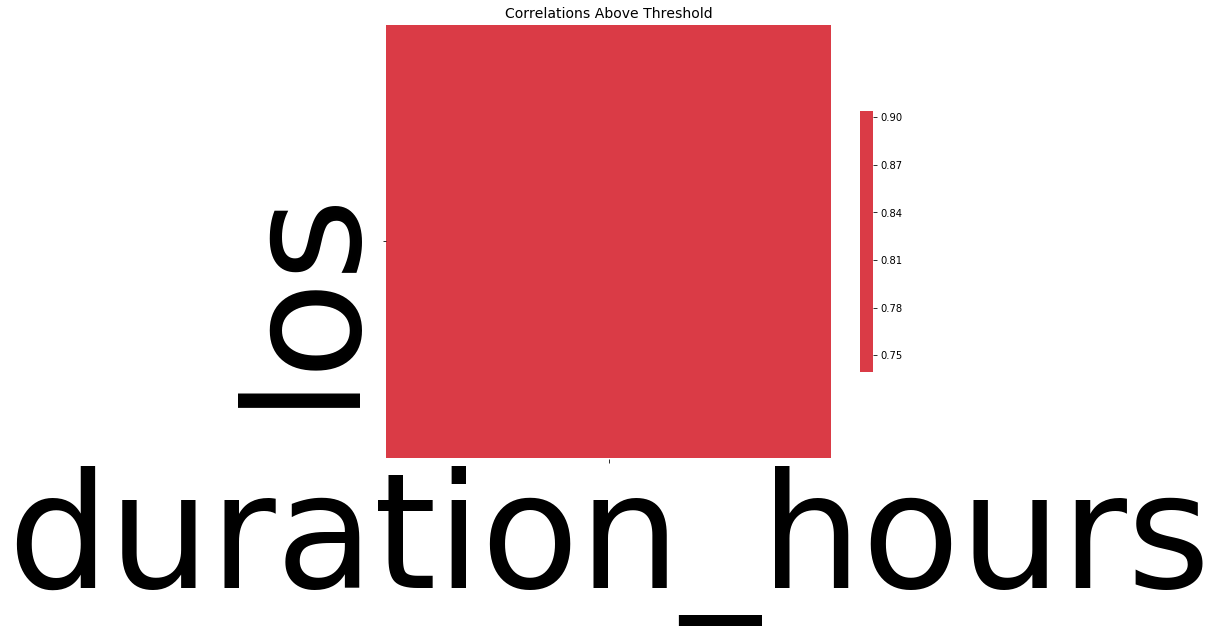

In [8]:
fs.plot_collinear()

In [9]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,duration_hours,los,0.821701


In [10]:
#zero importance feature
fs.identify_zero_importance(task='regression',eval_metric='12', n_iterations=10, early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[181]	valid_0's l2: 0.0573234
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0535438
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[111]	valid_0's l2: 0.0561692
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[282]	valid_0's l2: 0.0556066
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[273]	valid_0's l2: 0.0545069
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[83]	valid_0's l2: 0.0566699
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[183]	valid_0's l2: 0.0588751
Training until validation scores don't improve for 100 rounds.
Early st

In [11]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

In [12]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 25 original features
There are 0 one-hot features


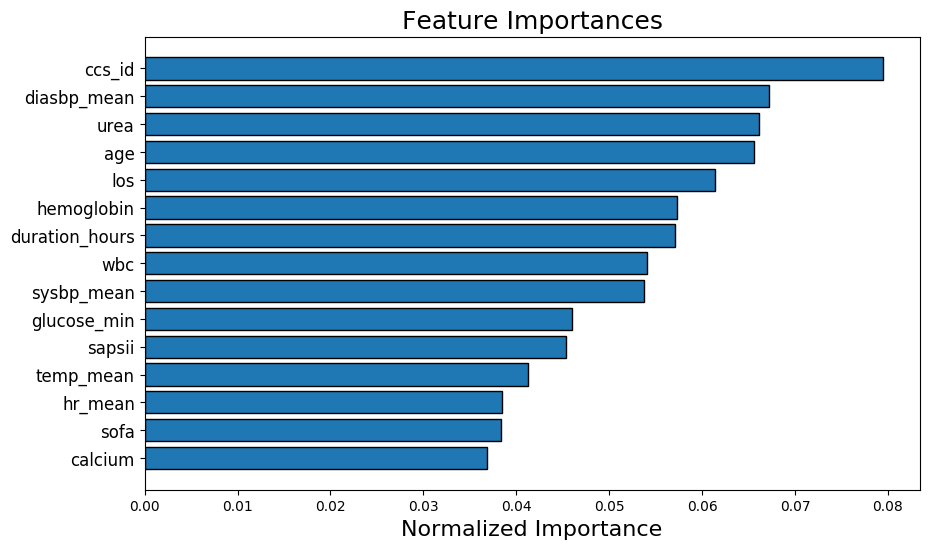

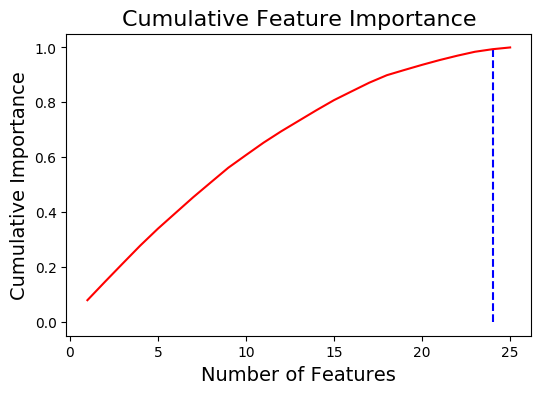

24 features required for 0.99 of cumulative importance


In [13]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [14]:
fs.feature_importances.head(11)

,feature,importance,normalized_importance,cumulative_importance
0,ccs_id,426.3,0.079430,0.079430
1,diasbp_mean,360.9,0.067244,0.146674
2,urea,355.0,0.066145,0.212819
3,age,351.8,0.065549,0.278368
4,los,329.4,0.061375,0.339743
5,hemoglobin,307.3,0.057257,0.397000
6,duration_hours,306.4,0.057090,0.454090
7,wbc,290.4,0.054108,0.508198
8,sysbp_mean,288.3,0.053717,0.561915
9,glucose_min,246.6,0.045947,0.607863


In [15]:
#compare with sixclass table
train=pd.read_csv('Data/finalData/sixLeft.csv')
train_labels=train['class']
train_labels
train.shape

(45569, 27)

In [16]:
#zero importance feature
fs.identify_zero_importance(task='regression',eval_metric='12', n_iterations=10, early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[161]	valid_0's l2: 0.0550977
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's l2: 0.059446
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[241]	valid_0's l2: 0.0587119
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[145]	valid_0's l2: 0.0565128
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[190]	valid_0's l2: 0.0581557
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[274]	valid_0's l2: 0.0558295
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[142]	valid_0's l2: 0.0550279
Training until validation scores don't improve for 100 rounds.
Early sto

In [17]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

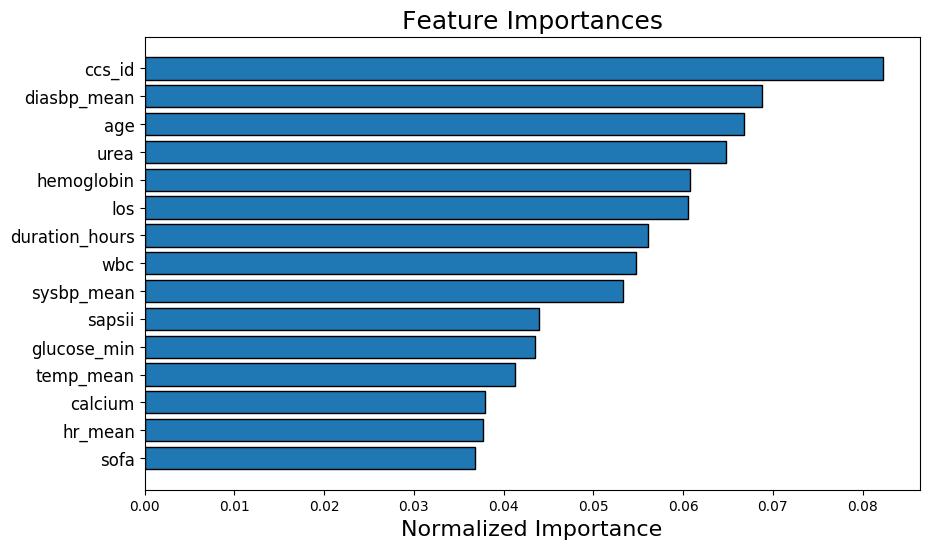

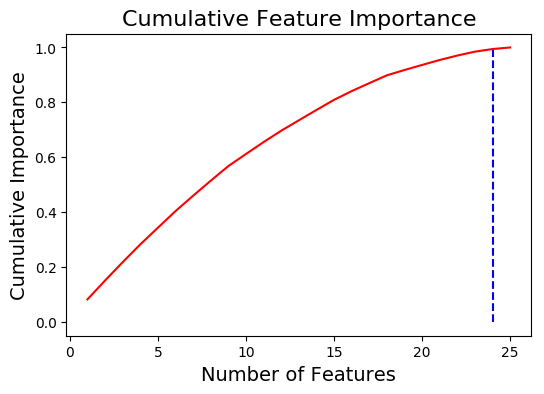

24 features required for 0.99 of cumulative importance


In [18]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [19]:
fs.feature_importances.head(11)

,feature,importance,normalized_importance,cumulative_importance
0,ccs_id,407.1,0.082242,0.082242
1,diasbp_mean,340.3,0.068747,0.150990
2,age,330.6,0.066788,0.217778
3,urea,320.5,0.064747,0.282525
4,hemoglobin,300.7,0.060747,0.343273
5,los,299.5,0.060505,0.403778
6,duration_hours,277.5,0.056061,0.459838
7,wbc,270.8,0.054707,0.514545
8,sysbp_mean,263.8,0.053293,0.567838
9,sapsii,217.7,0.043980,0.611818


In [20]:
"""
1. The feature of importance varies between test dataset "two-class" and "six-class" tables.
2. The whole dataset was tested instead of merely using training data.
3. Instability of feature importance appeared after running model each time the same as Koehrsen mentioned in his blog. 
"""

'\n1. The feature of importance varies between test dataset "two-class" and "six-class" tables.\n2. The whole dataset was tested instead of merely using training data.\n3. Instability of feature importance appeared after running model each time the same as Koehrsen mentioned in his blog. \n'

In [4]:
# Now try another approach #https://www.kaggle.com/dansbecker/permutation-importance

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv("Data/finalData/twoclassleft.csv")
X = df.iloc[:,1:26]
y = df.iloc[:,26]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [23]:
import eli5
from eli5.sklearn import PermutationImportance
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
rf_clf= RandomForestClassifier(random_state=1).fit(train_X, train_y)

# Permutation Importance
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names= val_X.columns.tolist())

Weight,Feature
0.0219 ± 0.0018,diasbp_mean
0.0205 ± 0.0025,sapsii
0.0177 ± 0.0010,angus
0.0173 ± 0.0011,hemoglobin
0.0168 ± 0.0015,ccs_id
0.0156 ± 0.0005,los
0.0150 ± 0.0013,duration_hours
0.0141 ± 0.0010,sysbp_mean
0.0141 ± 0.0015,age
0.0131 ± 0.0015,urea


In [24]:
#try with six class table

In [6]:
df=pd.read_csv("Data/finalData/sixleft.csv")
X = df.iloc[:,1:26]
y = df.iloc[:,26]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [26]:
import eli5
from eli5.sklearn import PermutationImportance
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
rf_clf= RandomForestClassifier(random_state=1).fit(train_X, train_y)

# Permutation Importance
perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names= val_X.columns.tolist())

Weight,Feature
0.0891 ± 0.0046,duration_hours
0.0642 ± 0.0051,los
0.0576 ± 0.0027,GCS
0.0570 ± 0.0038,pain
0.0541 ± 0.0016,diasbp_mean
0.0475 ± 0.0013,sofa
0.0450 ± 0.0029,hemoglobin
0.0427 ± 0.0037,temp_mean
0.0398 ± 0.0014,glucose_min
0.0352 ± 0.0024,albumin


In [27]:
#owing to the different results generated, the feature generation part was skipped. All the 26 variables remained. 

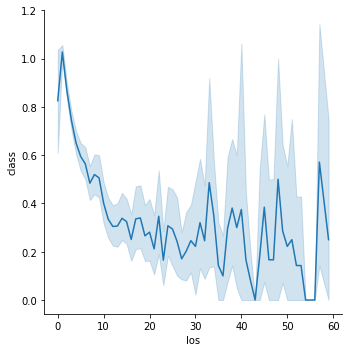

In [8]:
import seaborn as sns
sns.relplot(x="los", y="class", kind="line",dashes=False, markers=True, data=df);

In [56]:
df=pd.read_csv("Data/finalData/twoclassleft.csv")
X = df.iloc[:,1:26]
y = df.iloc[:,26]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

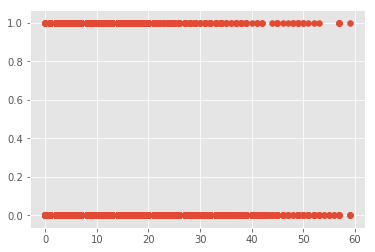

In [57]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x="los", y="class", data=df)
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split

from collections import Counter

from imblearn.datasets import make_imbalance
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                solver='lbfgs', multi_class='auto'))
X_resampled, y_resampled = iht.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))


[(0, 3053), (1, 3053)]


In [59]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
   X_resampled, y_resampled, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({1: 2318, 0: 2261})
Testing target statistics: Counter({0: 792, 1: 735})


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

#from sklearn import knn, datasets
from sklearn.model_selection import train_test_split
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC())) take too long time https://stats.stackexchange.com/questions/345717/why-does-my-svm-take-so-long-to-run
# evaluate each model in turn
results = []
names = []
seed=7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
#The best model is LR in this case

LR: 0.991700 (0.003887)
LDA: 0.971827 (0.009339)
KNN: 0.899973 (0.012047)
CART: 0.915700 (0.009843)
NB: 0.889710 (0.014588)


In [73]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(class_weight="balanced")
LR.fit(X_train, y_train)
#predictions = LR.predict(X_test)
y_pred=LR.predict(X_test)
class_names =['0','1','2','3','4','5']
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.991486574983628
[[791   1]
 [ 12 723]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       792
           1       1.00      0.98      0.99       735

   micro avg       0.99      0.99      0.99      1527
   macro avg       0.99      0.99      0.99      1527
weighted avg       0.99      0.99      0.99      1527



In [68]:
#in functions
from sklearn.metrics import accuracy_score

def generateClassificationReport(y_test,y_pred):
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))    
    print('accuracy is ',accuracy_score(y_test,y_pred))
generateClassificationReport(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       792
           1       1.00      0.98      0.99       735

   micro avg       0.99      0.99      0.99      1527
   macro avg       0.99      0.99      0.99      1527
weighted avg       0.99      0.99      0.99      1527

[[791   1]
 [ 12 723]]
accuracy is  0.991486574983628


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x="duration_hours", y="class", data=df)
plt.show()


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
generateClassificationReport(y_test,y_pred)




In [ ]:
#https://stackoverflow.com/questions/12487060/matplotlib-color-according-to-class-labels
arr1 = [1, 2, 3, 4, 5]
arr2 = [2, 3, 3, 4, 4]
labl = [0, 1, 1, 0, 0]
color= ['red' if l == 0 else 'green' for l in labl]
plt.scatter(arr1, arr2, color=color)